# OPCs

Like with Oligodendrocytes, I do not have high confidence in the OPCs subclustering. I have chosen to keep a subclustering annotation to attempt to match the other cell types regarding levels of annotation. 

 - **Cluster 0** - Gene expression consistent with OPCs
 - **Cluster 1** - Gene expression consistent with several other less well-defined clusters in this analysis, such as MT-RNR1 and MT-RNR2, KCNIP4 and CSMD1, suggesting these genes may be cytoplasmic contamination in low-quality/damaged clusters. 

# 1.0 First checks 

In [ ]:
import muon as mu
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
mudata = mu.read('OPCs_clustered.h5mu')

mudata['rna'].obsm['X_umap'] = mudata.obsm['X_umap']
mudata['rna'].obs['mm_leiden_res0.2'] = mudata.obs['leiden_res0.2']

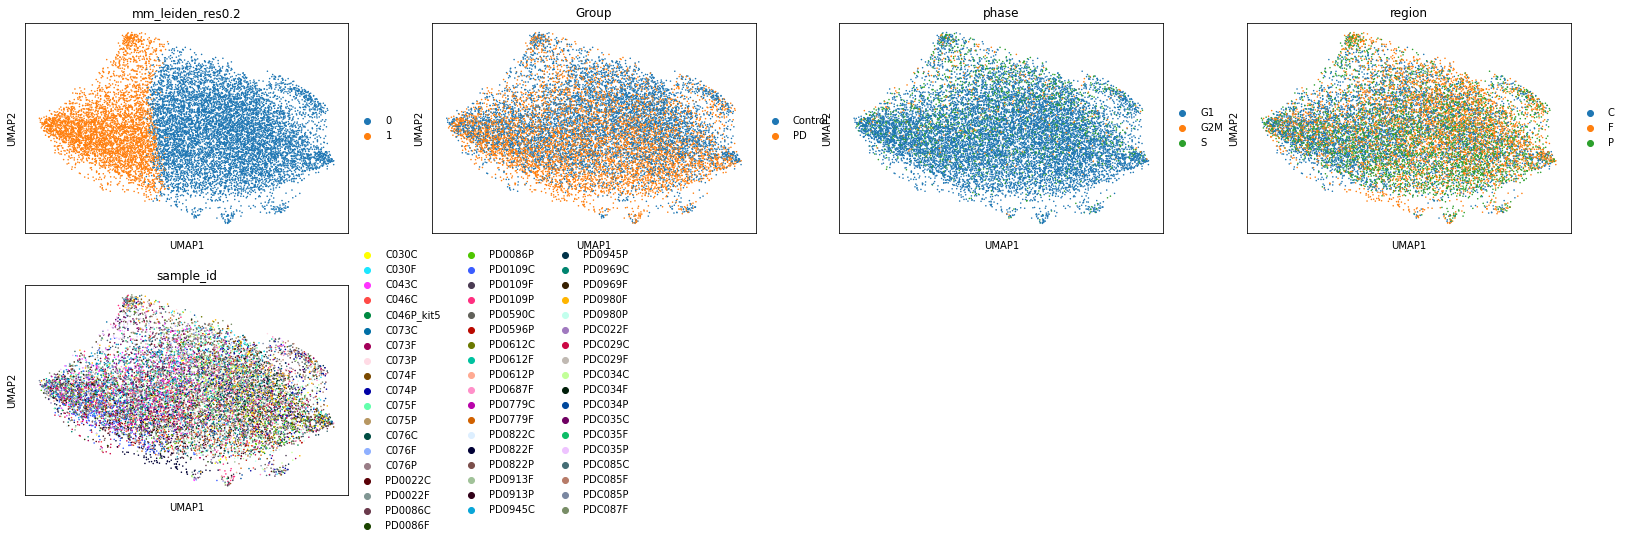

In [4]:
genes = ['mm_leiden_res0.2', 'Group', 'phase', 'region','sample_id']

sc.pl.umap(mudata['rna'], color = genes)

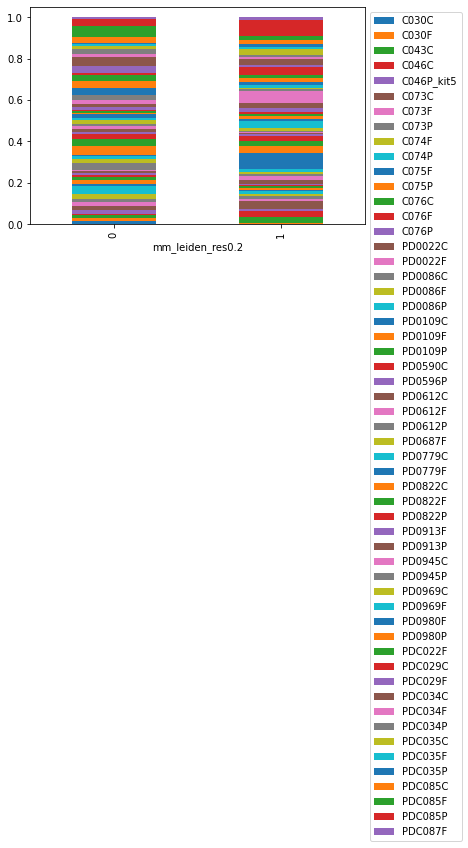

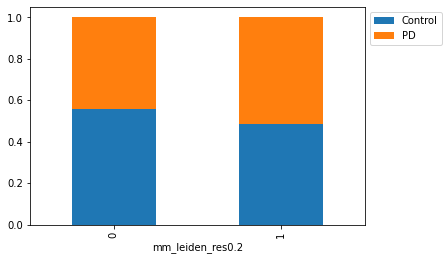

In [5]:
tmp = pd.crosstab(mudata['rna'].obs['mm_leiden_res0.2'],mudata['rna'].obs['sample_id'],normalize='index')
tmp.plot.bar(stacked=True).legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

tmp = pd.crosstab(mudata['rna'].obs['mm_leiden_res0.2'],mudata['rna'].obs['Group'],normalize='index')
tmp.plot.bar(stacked=True).legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

# 2.0 Check markers

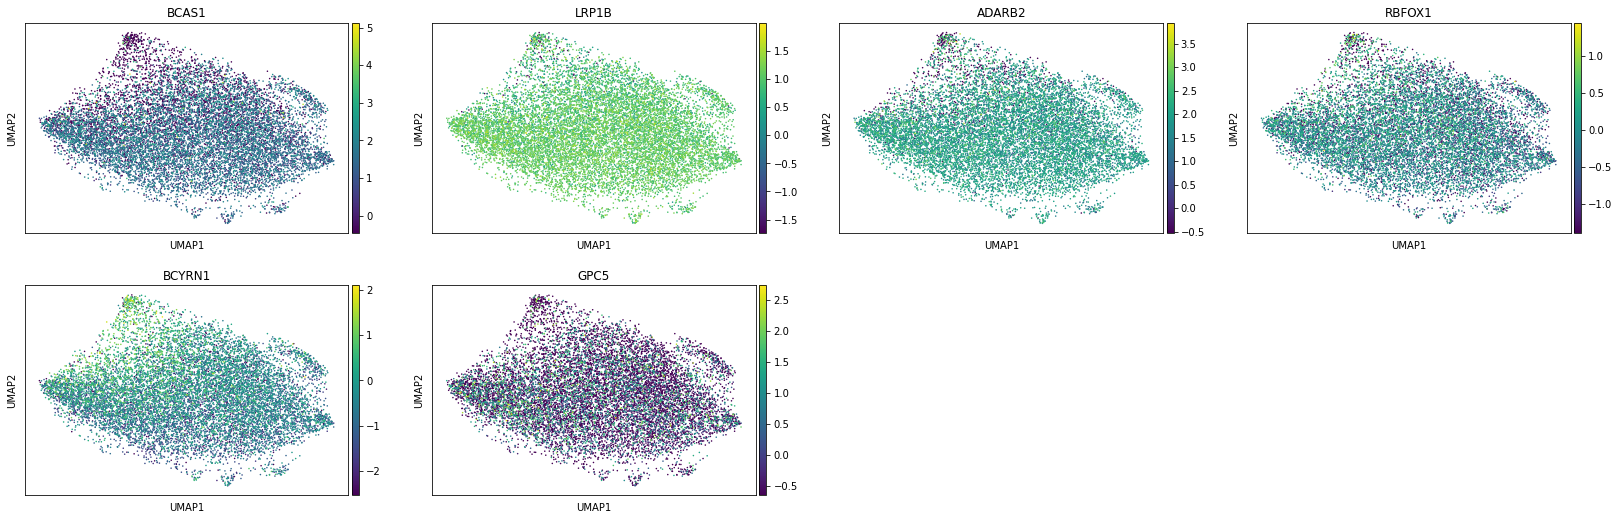

In [24]:
sc.pl.umap(mudata['rna'], color = ['BCAS1','LRP1B','ADARB2', 'RBFOX1','BCYRN1', 'GPC5'])

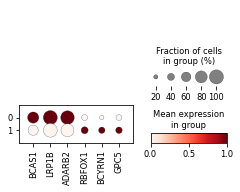

In [23]:
sc.pl.dotplot(mudata['rna'], ['BCAS1','LRP1B','ADARB2', 'RBFOX1','BCYRN1', 'GPC5'], groupby='mm_leiden_res0.2', standard_scale = 'var')

# 3.0 Cluster characterisation (HVGs) 

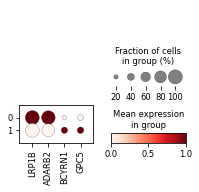

In [25]:
sc.pl.dotplot(mudata['rna'], ['LRP1B','ADARB2','BCYRN1', 'GPC5'], groupby='mm_leiden_res0.2', standard_scale = 'var')

# 4.0 Label transfer and final checks

In [22]:
mudata['rna'].obs['annotation_level_0'] = mudata['rna'].obs['mm_leiden_res0.2'].replace({
    '0' : 'Oligodendrocytes',
    '1' : 'Oligodendrocytes'
})

mudata['rna'].obs['annotation_level_1'] = mudata['rna'].obs['mm_leiden_res0.2'].replace({
    '0' : 'OPCs',
    '1' : 'OPCs'
})

mudata['rna'].obs['annotation_level_2'] = mudata['rna'].obs['mm_leiden_res0.2'].replace({
    '0' : 'BCAS1hi_LRP1Bhi',
    '1' : 'RBFOX1hi_GPC5hi'
})

mudata['rna'].obs[['annotation_level_0','annotation_level_1','annotation_level_2']].to_csv('../../all_subclustered_annotations/OPCs_annotations.csv')